Alicia Sigmon

als333@pitt.edu 

12/03/17

# Discourse Analysis of the Australian Radio Talkback Corpus

## About the Data:
- 27 transcribed recordings of samples of national, regional and commercial Australian talkback radio from 2004 to 2006.
- *raw files* and text files
- Closed Data


## Plan: 
- Original Format
- Formatting
- Speaker Analyses
- Gender Analyses 
- Back Channel Analyses

## Resource for Gender Analysis:
Language Log Article: [Men Interrupt More than Women](http://languagelog.ldc.upenn.edu/nll/?p=13422)

In [1]:
%pprint

Pretty printing has been turned OFF


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import nltk
import pandas as pd

# visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

## Reading in Data Frames

In [4]:
# reading in data frames
speaker_df=pd.read_csv("data_files/Speakers.csv")
art_df=pd.read_csv("data_files/Texts.csv")
bk_df=pd.read_csv("data_files/Back_Channels.csv")

# speaker_df.head()
# art_df.head()
# bk_df.head()

## Data Frames:

- speaker_df
    - data frame of all unique speakers
- art_df
    - data frame of each line of text
- bk_df
    - data frame of all back channels

In [5]:
# modifying data frame column names
speaker_df.columns = ["Speaker","Segment","Speaker_Type","Gender","Name","Number_of_Utterances"]
speaker_df = speaker_df.set_index("Speaker")

print("Speaker Data Frame:")
speaker_df.head()

art_df.columns = ["Speaker","Utterance_Number","Segment","Speaker_Type","Gender","Text","Word_Toks","Num_Words","Avg_Word_Length","Sents","Num_Sents"]
art_df = art_df.set_index(keys=["Speaker","Utterance_Number"])

print("Lines of Text Data Frame:")
art_df.head()

bk_df.columns = ["","Speaker","Speaker_Type","Speaker_Gender","Back_Channel","Line_Speaker","Segment_Utterance_Number","Segment","Line_Speaker_Type","Line_Speaker_Gender"]
bk_df = bk_df.set_index("")

print("Back Channel Data Frame:")
bk_df.head()

Speaker Data Frame:


,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-C1,ABCE1,C,F,Suzanne,17
ABCE1-C10,ABCE1,C,F,Beth,17
ABCE1-C11,ABCE1,C,F,Lynne,10
ABCE1-C12,ABCE1,C,M,Jack,12
ABCE1-C2,ABCE1,C,F,Lisa,13


Lines of Text Data Frame:


,,Segment,Speaker_Type,Gender,Text,Word_Toks,Num_Words,Avg_Word_Length,Sents,Num_Sents
Speaker,Utterance_Number,,,,,,,,,
ABCE1-P1,1,ABCE1,P,M,Thanks for that John Hall now John Hall will b...,"['Thanks', 'for', 'that', 'John', 'Hall', 'now...",80,4.700000,"[""Thanks for that John Hall now John Hall will...",2
ABCE1-E1,2,ABCE1,E,M,I guess yeah yeah <laughs>.,"['I', 'guess', 'yeah', 'yeah', '.']",5,3.000000,['I guess yeah yeah .'],1
ABCE1-P1,3,ABCE1,P,M,He's also known <E1 sounds reasonable> for his...,"['He', ""'s"", 'also', 'known', 'for', 'his', 'a...",159,5.062893,"[""He's also known for his ability to open cos...",3
ABCE1-E1,4,ABCE1,E,M,Okay.,"['Okay', '.']",2,2.500000,['Okay.'],1
ABCE1-P1,5,ABCE1,P,M,Jeanne Villani does and we'll find out the sec...,"['Jeanne', 'Villani', 'does', 'and', 'we', ""'l...",50,3.980000,"[""Jeanne Villani does and we'll find out the s...",1


Back Channel Data Frame:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,M,sounds reasonable,ABCE1-P1,3,ABCE1,P,M
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
3,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
4,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F


### Splitting Speakers by Role:

In [6]:
# dataframe of presenters
P_df=speaker_df.loc[speaker_df["Speaker_Type"]=='P',:]

# dataframe of callers
C_df=speaker_df.loc[speaker_df["Speaker_Type"]=='C',:]

# dataframe of experts
E_df=speaker_df.loc[speaker_df["Speaker_Type"]=='E',:]

### All Presenters:
12 total, with 8 males and 4 females, **but** there are actually 4 unqiue males and 4 unique females.

In [7]:
P_df

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68


## Distribution of Speakers:

### How many Speakers are there for each Role?
- 12 Presenters
- 134 Callers
- 16 Experts

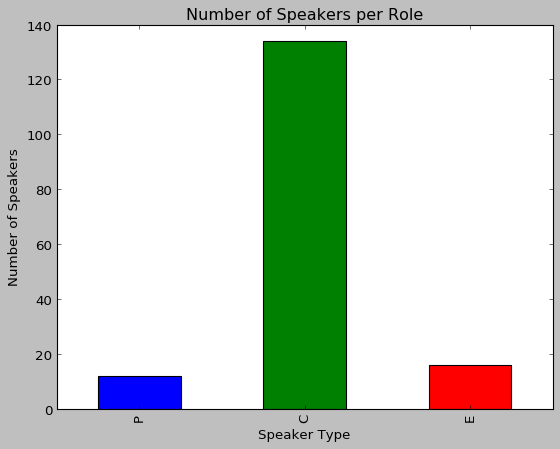

In [8]:
# Number of Speakers per Role
speaker_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Number of Speakers per Role")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Speakers")
plt.show()

### How many Males vs. Females?
- 100 Males
- 62 Females

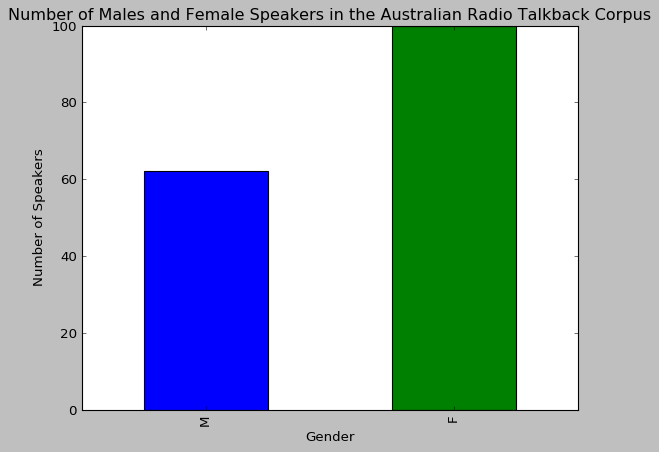

In [9]:
speaker_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Number of Males and Female Speakers in the Australian Radio Talkback Corpus")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

### How are Males and Females distributed across Roles?

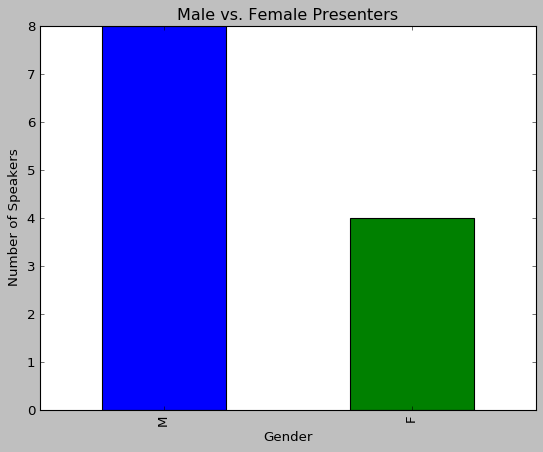

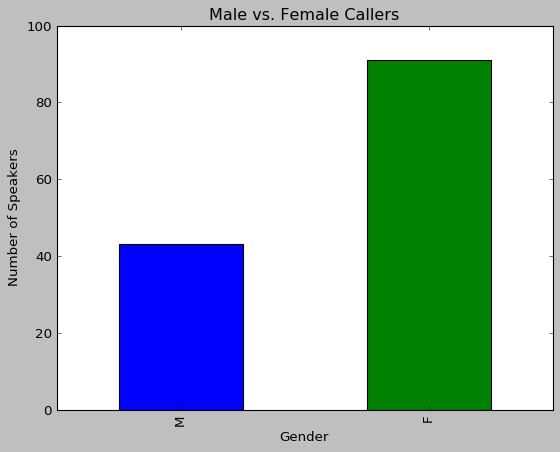

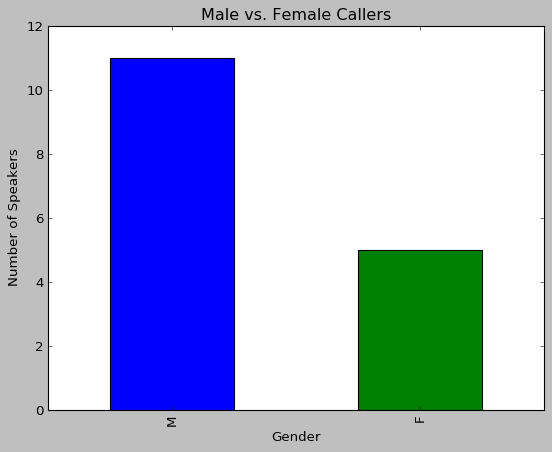

In [10]:
P_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Presenters")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

C_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Callers")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

E_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male vs. Female Callers")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

## Comparison by Speaker Type:
- Number of Turns
- Number of Sentences
- Number of Words
- Average Word Length
- Average Sentence Length
- Average Number of Turns

In [11]:
# data frames for Presenter, Caller, and Expert Lines
P_art_df=art_df.loc[art_df["Speaker_Type"]=='P',:]
C_art_df=art_df.loc[art_df["Speaker_Type"]=='C',:]
E_art_df=art_df.loc[art_df["Speaker_Type"]=='E',:]

In [12]:
# Presenter vs. Caller vs. Experts

# utterances
print("Turns:")
art_df["Speaker_Type"].value_counts().reindex(["P","C","E"])

# sentences
print("Number of Sentences:")
P_art_df["Num_Sents"].sum()
C_art_df["Num_Sents"].sum() 
E_art_df["Num_Sents"].sum()

# words
print("Number of Words:")
P_art_df["Num_Words"].sum()
C_art_df["Num_Words"].sum() 
E_art_df["Num_Words"].sum()

# avg word length
print("Average Word Length:")
P_art_df["Avg_Word_Length"].mean()
C_art_df["Avg_Word_Length"].mean()
E_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
P_art_df["Num_Words"].sum()/P_art_df["Num_Sents"].sum()
C_art_df["Num_Words"].sum()/C_art_df["Num_Sents"].sum() 
E_art_df["Num_Words"].sum()/E_art_df["Num_Sents"].sum() 

print("Average Number of Turns:")
P_df["Number_of_Utterances"].mean()
C_df["Number_of_Utterances"].mean()
E_df["Number_of_Utterances"].mean()

Turns:


P    1470
C    1505
E    1464
Name: Speaker_Type, dtype: int64

Number of Sentences:


2267

1987

2398

Number of Words:


34840

25510

44678

Average Word Length:


3.4334774099213576

3.1314589517759193

3.3786742523675644

Average Sentence Length:


15.368328187031318

12.838449924509311

18.631359466221852

Average Number of Turns:


122.5

11.23134328358209

91.5

Summary of Key Information:
- Same Total Number of Turns per Speaker Type
- Average Number of Turns
    - Presenters > Experts > Callers
- More Callers with fewer turns
- Fewer Presenters with more turns
- Experts have the longest sentences

## Comparison by Gender:
- Number of Turns
- Number of Sentences
- Number of Words
- Average Word Length
- Average Sentence Length
- Average Number of Turns

In [13]:
# Males vs. Females 

# utterances
print("Utterances:")
art_df["Gender"].value_counts().reindex(["M","F"])

# data frames for male and female lines
M_art_df=art_df.loc[art_df["Gender"]=='M',:]
F_art_df=art_df.loc[art_df["Gender"]=='F',:]

# sentences
print("Number of Sentences:")
M_art_df["Num_Sents"].sum()
F_art_df["Num_Sents"].sum() 

# words
print("Number of Words:")
M_art_df["Num_Words"].sum()
F_art_df["Num_Words"].sum() 

# avg word length
print("Average Word Length:")
M_art_df["Avg_Word_Length"].mean()
F_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
M_art_df["Num_Words"].sum()/M_art_df["Num_Sents"].sum()
F_art_df["Num_Words"].sum()/F_art_df["Num_Sents"].sum()

# building male and female data frames from speaker_df
M_df=speaker_df.loc[speaker_df["Gender"]=='M',:]
F_df=speaker_df.loc[speaker_df["Gender"]=='F',:]

print("Average Number of Turns:")
M_df["Number_of_Utterances"].mean()
F_df["Number_of_Utterances"].mean()

Utterances:


M    2218
F    2221
Name: Gender, dtype: int64

Number of Sentences:


3339

3313

Number of Words:


52329

52699

Average Word Length:


3.3785191962851093

3.2475826398527219

Average Sentence Length:


15.672057502246181

15.906731059462723

Average Number of Turns:


35.774193548387096

22.210000000000001

Summary of Key Information:
- Overall about the same
- Men on average have more turns

## Back Channels

### What are the Back Channels? Which ones are most common?

In [14]:
bk_df["Back_Channel"].value_counts()[:20]

mm              266
yeah            250
yes             218
laughs          178
inaudible       175
mhm             129
right           125
laugh            78
yep              76
okay             52
oh               27
oh okay          21
no               18
uh               18
that's right     12
um               11
thank you        11
uhuh             10
alright           9
ah                9
Name: Back_Channel, dtype: int64

### What Speaker Type has the most Back Channels?

In [15]:
# number of back channels per speaker type
bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"])

P    491
C    969
E    757
Name: Speaker_Type, dtype: int64

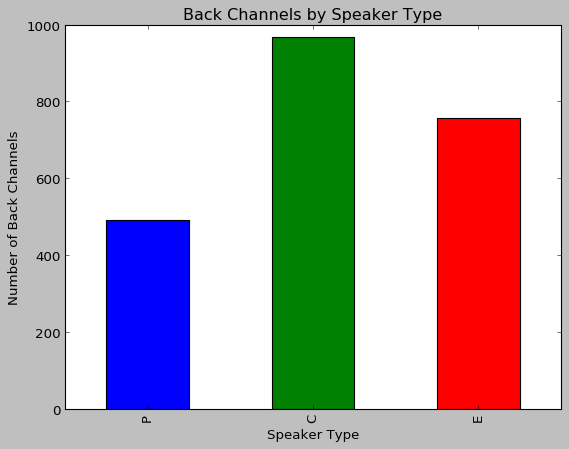

In [16]:
bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Speaker Type")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

Callers utter the most Back Channels.

- **Ideas:** 
    - Many callers with few lines
    - Least professional group

### What Speaker Type has the most number of Back Channels uttered during their lines?

In [17]:
bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"])

P    750
C    569
E    900
Name: Line_Speaker_Type, dtype: int64

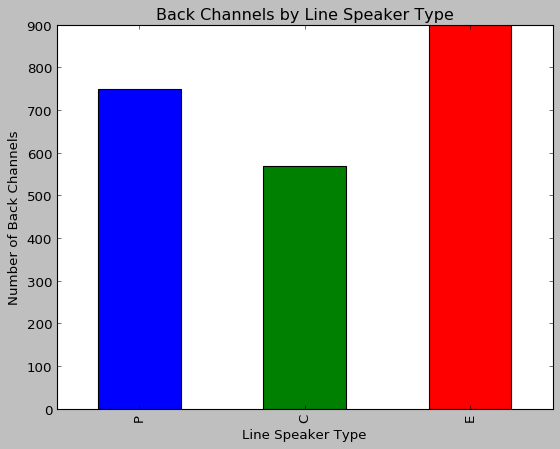

In [18]:
bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Line Speaker Type")
plt.xlabel("Line Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

Experts Lines have the most number of Back Channels, and Experts have the longest sentences.

**Conclusion:** Longer Sentences lead to more back channels.

### What Gender utters the most Back Channels? What Gender has the most Back Channels uttered while they are speaking?

In [19]:
# number of back channels per gender
bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])

# number of lines with back channels per gender
bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

M    1073
F    1146
Name: Speaker_Gender, dtype: int64

M    1091
F    1128
Name: Line_Speaker_Gender, dtype: int64

**Conclusion:** Men and Women produce back channels about the same number of times overall in a conversation, with Females leading slightly for both questions.

### Are Men more likely to utter Back Channels when a Women or Man is speaking? How about the other way around?

In [22]:
# Male Back Channels
M_bk_df=bk_df.loc[bk_df["Speaker_Gender"]=='M',:]
                  
# Female Back Channels
F_bk_df=bk_df.loc[bk_df["Speaker_Gender"]=='F',:]

# peaking at the data frames
M_bk_df.head()
F_bk_df.head()

,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,M,sounds reasonable,ABCE1-P1,3,ABCE1,P,M
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
3,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
4,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
5,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
7,ABCE1-C1,C,F,mhm,ABCE1-P1,14,ABCE1,P,M
8,ABCE1-C1,C,F,uh,ABCE1-E1,23,ABCE1,E,M
11,ABCE1-C1,C,F,laugh,ABCE1-C1,24,ABCE1,C,F
14,ABCE1-C1,C,F,mm,ABCE1-E1,31,ABCE1,E,M


In [23]:
print("The Gender of the Line's Speaker during All Instances of Male Back Channels:")
M_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])
print("The Gender of the Line's Speaker during All Instances of Female Back Channels:")
F_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

The Gender of the Line's Speaker during All Instances of Male Back Channels:


M    679
F    394
Name: Line_Speaker_Gender, dtype: int64

The Gender of the Line's Speaker during All Instances of Female Back Channels:


M    412
F    734
Name: Line_Speaker_Gender, dtype: int64

**Conclusion:** *Men* produce more Back Channels when *Other Men* are talking, and *Women* produce more back channels when *Other Women* are talking. 

#### Next Question: How does Speaker Type Affect Men and Women's Back Channels?

## Presenter Gender Analysis

### Presenter Distribution:
- 12 Unique Speaker Ids
    - 8 Male Ids
    - 4 Female Ids
- 8 Unique Speakers
    - 4 Males
    - 4 Females

In [24]:
# Presenter Data Frame:
P_df

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68


### Making Data Frames:

In [25]:
# Male and Female Presenter Data Frames:
M_P_df=P_df.loc[P_df["Gender"]=='M',:]
F_P_df=P_df.loc[P_df["Gender"]=='F',:]

M_P_df
F_P_df

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68
COME3-P1,COME3,P,M,Luke Bona,61
COME5-P1,COME5,P,M,Spencer,65


,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
COME5-P2,COME5,P,F,Sharina,491


In [26]:
# Male and Female Presenter Lines Data Frames:
M_P_art_df=P_art_df.loc[P_art_df["Gender"]=='M',:]
F_P_art_df=P_art_df.loc[P_art_df["Gender"]=='F',:]

M_P_art_df.head()
F_P_art_df.head()

Segment Speaker_Type Gender  \
Speaker  Utterance_Number                               
ABCE1-P1 1                  ABCE1            P      M   
         3                  ABCE1            P      M   
         5                  ABCE1            P      M   
         6                  ABCE1            P      M   
         8                  ABCE1            P      M   

                                                                        Text  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 Thanks for that John Hall now John Hall will b...   
         3                 He's also known <E1 sounds reasonable> for his...   
         5                 Jeanne Villani does and we'll find out the sec...   
         6                 Eight-triple-three-one-thousand one-eight-hund...   
         8                                                      How are you.   

                                                                   Word_Toks  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 ['Thanks', 'for', 'that', 'John', 'Hall', 'now...   
         3                 ['He', "'s", 'also', 'known', 'for', 'his', 'a...   
         5                 ['Jeanne', 'Villani', 'does', 'and', 'we', "'l...   
         6                 ['Eight-triple-three-one-thousand', 'one-eight...   
         8                                        ['How', 'are', 'you', '.']   

                           Num_Words  Avg_Word_Length  \
Speaker  Utterance_Number                               
ABCE1-P1 1                        80         4.700000   
         3                       159         5.062893   
         5                        50         3.980000   
         6                        13         8.692308   
         8                         4         2.500000   

                                                                       Sents  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 ["Thanks for that John Hall now John Hall will...   
         3                 ["He's also known  for his ability to open cos...   
         5                 ["Jeanne Villani does and we'll find out the s...   
         6                 ["Eight-triple-three-one-thousand one-eight-hu...   
         8                                                  ['How are you.']   

                           Num_Sents  
Speaker  Utterance_Number             
ABCE1-P1 1                         2  
         3                         3  
         5                         1  
         6                         1  
         8                         1

,,Segment,Speaker_Type,Gender,Text,Word_Toks,Num_Words,Avg_Word_Length,Sents,Num_Sents
Speaker,Utterance_Number,,,,,,,,,
ABCE3-P1,1,ABCE3,P,F,If you haven't been with us before this how it...,"['If', 'you', 'have', ""n't"", 'been', 'with', '...",31,4.290323,"[""If you haven't been with us before this how ...",1
ABCE3-P2,2,ABCE3,P,F,Good afternoon Lynne.,"['Good', 'afternoon', 'Lynne', '.']",4,4.750000,['Good afternoon Lynne.'],1
ABCE3-P1,3,ABCE3,P,F,<laughs> It's like being at school. And we tal...,"['It', ""'s"", 'like', 'being', 'at', 'school', ...",50,3.420000,"["" It's like being at school."", ""And we talk a...",2
ABCE3-P2,4,ABCE3,P,F,And so yes.,"['And', 'so', 'yes', '.']",4,2.250000,['And so yes.'],1
ABCE3-P1,5,ABCE3,P,F,Wo we run.,"['Wo', 'we', 'run', '.']",4,2.000000,['Wo we run.'],1


### Presenter Gender Statistics:

In [27]:
# utterances
print("Number of Utterances:")
P_art_df["Gender"].value_counts().reindex(["M","F"])

# sentences:
print("Number of Sentences:")
M_P_art_df["Num_Sents"].sum()
F_P_art_df["Num_Sents"].sum()

# words
print("Number of Words:")
M_P_art_df["Num_Words"].sum()
F_P_art_df["Num_Words"].sum() 

# avg word length
print("Average Word Length:")
M_P_art_df["Avg_Word_Length"].mean()
F_P_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
M_P_art_df["Num_Words"].sum()/M_P_art_df["Num_Sents"].sum()
F_P_art_df["Num_Words"].sum()/F_P_art_df["Num_Sents"].sum()

print("Average Number of Turns:")
M_P_df["Number_of_Utterances"].mean()
F_P_df["Number_of_Utterances"].mean()

Number of Utterances:


M    771
F    699
Name: Gender, dtype: int64

Number of Sentences:


1098

1169

Number of Words:


14958

19882

Average Word Length:


3.4874046778003658

3.3739954020033096

Average Sentence Length:


13.622950819672131

17.00769888793841

Average Number of Turns:


96.375

174.75

Female Presenters have more sentences, and longer sentences. They also take on average more turns than Male Presenters.

## Presenter Gender Back Channel Analysis

### Data Frame of Presenter Back Channels:

In [28]:
# Presenter's saying back channels
print("Presenters Uttering Back Channels:")
P_bk_df=bk_df.loc[bk_df["Speaker_Type"]=='P',:]
P_bk_df.head()

Presenters Uttering Back Channels:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
6,ABCE1-P1,P,M,mm,ABCE1-C1,13,ABCE1,C,F
19,ABCE1-P1,P,M,hundred years,ABCE1-E1,44,ABCE1,E,M
23,ABCE1-P1,P,M,can you,ABCE1-E1,48,ABCE1,E,M
30,ABCE1-P1,P,M,laughs,ABCE1-E1,68,ABCE1,E,M


In [29]:
print("All Instances of Male and Female Presenters Contributing Back Channels:") 
P_bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])
print("All Male and Female Lines that Contained Presenter Back Channels") 
P_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

All Instances of Male and Female Presenters Contributing Back Channels:


M    241
F    250
Name: Speaker_Gender, dtype: int64

All Male and Female Lines that Contained Presenter Back Channels


M    199
F    292
Name: Line_Speaker_Gender, dtype: int64

### Observations: 

- Male and Female Presenters uttered about the same number of back channels throughout the corpus.
- More Females Lines had Female Presenter Back Channels.
     - **Conclusion:** *Female Presenters* are more likely to utter Back Channels when talking to *other females.*

### Data Frame of Presenter Lines with Back Channels:

In [30]:
# Presenter lines that include back channels
print("Presenter Lines that Include Back Channels:")
P_line_bk_df=bk_df.loc[bk_df["Line_Speaker_Type"]=='P',:]
P_line_bk_df.head()

Presenter Lines that Include Back Channels:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,M,sounds reasonable,ABCE1-P1,3,ABCE1,P,M
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
7,ABCE1-C1,C,F,mhm,ABCE1-P1,14,ABCE1,P,M
20,ABCE1-E1,E,M,mm,ABCE1-P1,45,ABCE1,P,M
21,ABCE1-E1,E,M,aerial roots,ABCE1-P1,45,ABCE1,P,M


In [31]:
print("All Presenter Lines that Contained Back Channels (by Any Speaker Type):")
P_line_bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])
print("All Instances of Male and Female Presenter Lines that Contained Back Channels :")
P_line_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

All Presenter Lines that Contained Back Channels (by Any Speaker Type):


M    301
F    449
Name: Speaker_Gender, dtype: int64

All Instances of Male and Female Presenter Lines that Contained Back Channels :


M    285
F    465
Name: Line_Speaker_Gender, dtype: int64

### Observations:

- Of the Presenter Lines that contained Back Channels, more of those back channels came from fellow females.
    - **Conclusion:** *Females* are more likely to contribute a back channel to a *Female Presenter* than a Male Presenter.
- Of the Presenter Lines that contained Back Channels, more Female Presenter Lines contained back channels.
    - **Conclusion:** *Speakers* are more likely to contribute a back channel to a *Female Presenter* than a Male Presenter.